<br>
<center>
<img src="https://raw.githubusercontent.com/elaynelemos/prediction-of-orders-dmc/main/assets/img/univasf-logo.png" width=200>
<h3>
    UNIVERSIDADE FEDERAL DO VALE DO SÃO FRANCISCO
    <br>COLEGIADO DE ENGENHARIA DE COMPUTAÇÃO
</h3>

<h3>Orientador</h3>
<span>Prof. Dr. Rosalvo Ferreira de Oliveira Neto</span>

<h3>Discentes</h3>
<span>Anísio Pereira Batista Filho
<br>Edjair Aguiar Gomes Filho
<br>Elayne Rute Lessa Lemos</span>
</center>
<br><br>

## Predição de pedidos com Redes Neurais e Random Forest

Projeto em: [github.com/elaynelemos/prediction-of-orders-dmc](https://github.com/elaynelemos/prediction-of-orders-dmc)

## Data Mining

### Importação das Bibliotecas

In [1]:
#OS
import os
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Matplotlib
import matplotlib.pyplot as plt

#Métricas do sklearn:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Keras
np.random.seed(1337) # for reproducibility
from keras.models import Sequential
from keras.layers import InputLayer, Dense
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

### Carregando os dados de treinamento

In [2]:
repo_url = 'https://raw.githubusercontent.com/elaynelemos/prediction-of-orders-dmc/main'

session_train_X_mean_drop_replacing = pd.read_csv(f'{repo_url}/data/session_train_X_mean_drop_replacing.csv')
session_train_X_mean_replacing = pd.read_csv(f'{repo_url}/data/session_train_X_mean_replacing.csv')
session_train_X_median_replacing = pd.read_csv(f'{repo_url}/data/session_train_X_median_replacing.csv')
session_train_X_min_replacing = pd.read_csv(f'{repo_url}/data/session_train_X_min_replacing.csv')

session_train_y_mean_drop_replacing = pd.read_csv(f'{repo_url}/data/session_train_y_mean_drop_replacing.csv')
session_train_y_mean_replacing = pd.read_csv(f'{repo_url}/data/session_train_y_mean_replacing.csv')
session_train_y_median_replacing = pd.read_csv(f'{repo_url}/data/session_train_y_median_replacing.csv')
session_train_y_min_replacing = pd.read_csv(f'{repo_url}/data/session_train_y_min_replacing.csv')

### Carregando os dados de teste

In [3]:
repo_url = 'https://raw.githubusercontent.com/elaynelemos/prediction-of-orders-dmc/main'

session_test_X_mean_drop_replacing = pd.read_csv(f'{repo_url}/data/session_test_X_mean_drop_replacing.csv')
session_test_X_mean_replacing = pd.read_csv(f'{repo_url}/data/session_test_X_mean_replacing.csv')
session_test_X_median_replacing = pd.read_csv(f'{repo_url}/data/session_test_X_median_replacing.csv')
session_test_X_min_replacing = pd.read_csv(f'{repo_url}/data/session_test_X_min_replacing.csv')

### Classificador Random Forest

### Para session_train_mean_drop_replacing


NÚMERO DO SPLIT: 1
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2259    49
0    98  1889
Acuracia: 0.9657741559953434
Precisão: 0.9584217225286381
Sensibilidade: 0.9787694974003466
Especificidade: 0.9506794162053347
Área sob a curva ROC: 0.9647244568028406


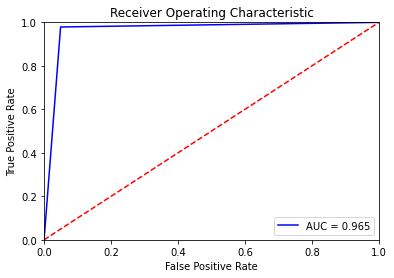


NÚMERO DO SPLIT: 2
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2268    50
0   108  1869
Acuracia: 0.9632130384167636
Precisão: 0.9545454545454546
Sensibilidade: 0.9784296807592753
Especificidade: 0.9453717754172989
Área sob a curva ROC: 0.9619007280882871


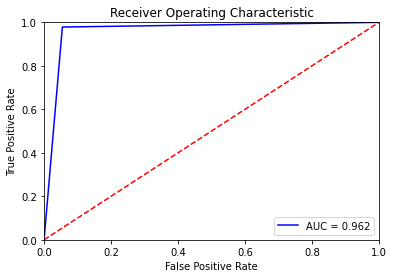


NÚMERO DO SPLIT: 3
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2239    51
0   122  1883
Acuracia: 0.959720605355064
Precisão: 0.9483269800931808
Sensibilidade: 0.9777292576419214
Especificidade: 0.9391521197007481
Área sob a curva ROC: 0.9584406886713347


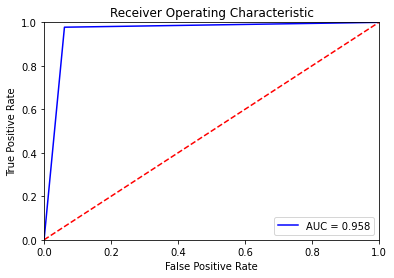


NÚMERO DO SPLIT: 4
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2249    33
0   101  1912
Acuracia: 0.9688009313154832
Precisão: 0.9570212765957447
Sensibilidade: 0.9855390008764242
Especificidade: 0.949826130153999
Área sob a curva ROC: 0.9676825655152116


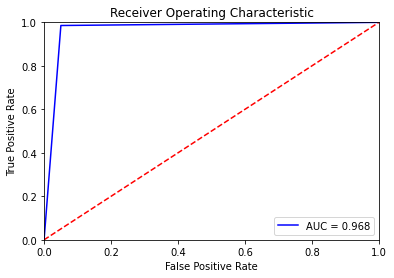


NÚMERO DO SPLIT: 5
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2247    53
0    77  1918
Acuracia: 0.969732246798603
Precisão: 0.9668674698795181
Sensibilidade: 0.9769565217391304
Especificidade: 0.9614035087719298
Área sob a curva ROC: 0.9691800152555301


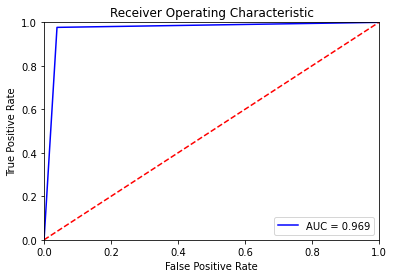


NÚMERO DO SPLIT: 6
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2245    46
0   115  1889
Acuracia: 0.9625145518044238
Precisão: 0.951271186440678
Sensibilidade: 0.9799214316892186
Especificidade: 0.9426147704590818
Área sob a curva ROC: 0.9612681010741503


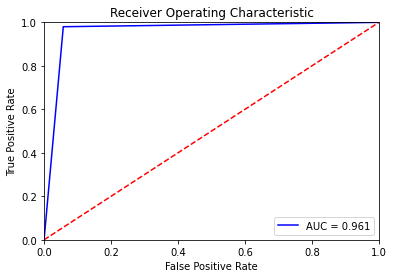


NÚMERO DO SPLIT: 7
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2297    50
0    97  1851
Acuracia: 0.9657741559953434
Precisão: 0.9594820384294068
Sensibilidade: 0.9786962079250107
Especificidade: 0.9502053388090349
Área sob a curva ROC: 0.9644507733670228


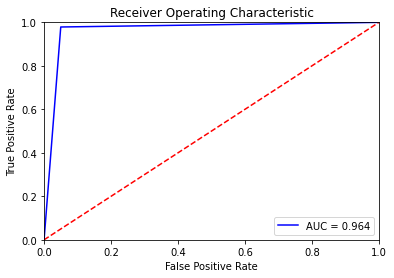


NÚMERO DO SPLIT: 8
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2295    52
0    97  1851
Acuracia: 0.9653084982537835
Precisão: 0.9594481605351171
Sensibilidade: 0.9778440562420111
Especificidade: 0.9502053388090349
Área sob a curva ROC: 0.964024697525523


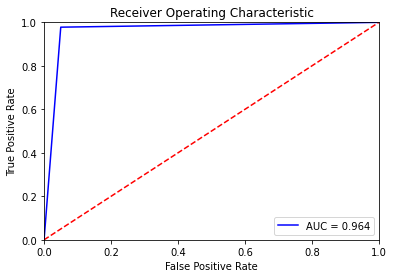


NÚMERO DO SPLIT: 9
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2253    48
0    92  1902
Acuracia: 0.9674039580908033
Precisão: 0.9607675906183369
Sensibilidade: 0.9791395045632334
Especificidade: 0.9538615847542627
Área sob a curva ROC: 0.9665005446587481


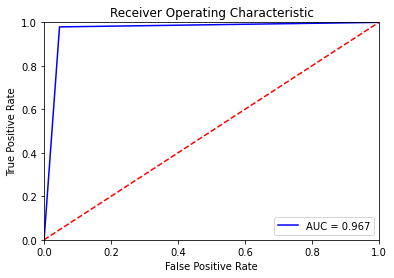


NÚMERO DO SPLIT: 10
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2259    62
0    99  1875
Acuracia: 0.9625145518044238
Precisão: 0.9580152671755725
Sensibilidade: 0.973287376130978
Especificidade: 0.9498480243161094
Área sob a curva ROC: 0.9615677002235437


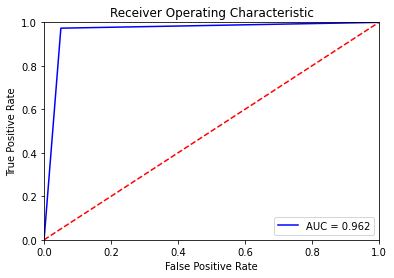

In [4]:
#Classificador Random Forest
## Para session_train_mean_drop_replacing

#MODELO
RF_mean_drop_replacing = RandomForestClassifier(n_estimators=100, max_features=10, random_state=42)

#CROSS-VALIDATION
X = session_train_X_mean_drop_replacing
y = session_train_y_mean_drop_replacing

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

kf = KFold(n_splits=10, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    RF_mean_drop_replacing.fit(X_train, y_train.order.to_numpy())

    #AVALIAÇÃO
    ##Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = RF_mean_drop_replacing.predict(X_test)

    ##Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    ###Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    ##Passo 3: Recuperar os valores da matriz de confusão
    ###Verdadeiro positivo
    a = df_cm.iloc[0,0]
    ###Falso positivo
    b = df_cm.iloc[1,0]
    ###Falso negativo
    c = df_cm.iloc[0, 1]
    ###Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
RF_y_pred_mean_drop_replacing = RF_mean_drop_replacing.predict(session_test_X_mean_drop_replacing)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)
    
DF_RF_y_pred_mean_drop_replacing = pd.DataFrame(RF_y_pred_mean_drop_replacing)
DF_RF_y_pred_mean_drop_replacing.to_csv(f"{path}/predictions/RF_session_predict_y_mean_drop_replacing.csv", sep=',', encoding='utf-8', index=False)

## Para session_train_mean_replacing


NÚMERO DO SPLIT: 1
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2296    49
0   109  2546
Acuracia: 0.9684
Precisão: 0.9546777546777547
Sensibilidade: 0.9791044776119403
Especificidade: 0.9589453860640301
Área sob a curva ROC: 0.9690249318379852


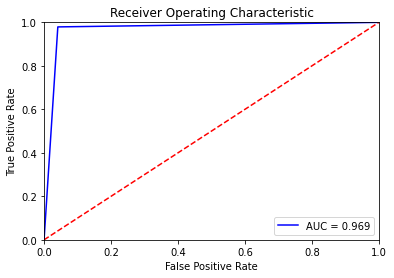


NÚMERO DO SPLIT: 2
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2229    62
0    90  2619
Acuracia: 0.9696
Precisão: 0.9611901681759379
Sensibilidade: 0.9729375818419904
Especificidade: 0.9667774086378738
Área sob a curva ROC: 0.9698574952399321


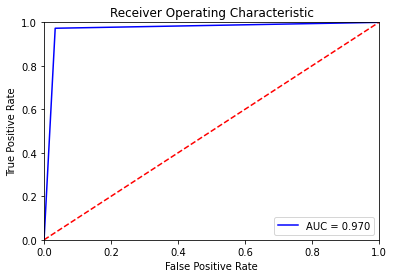


NÚMERO DO SPLIT: 3
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2288    57
0   104  2551
Acuracia: 0.9678
Precisão: 0.9565217391304348
Sensibilidade: 0.9756929637526652
Especificidade: 0.9608286252354049
Área sob a curva ROC: 0.968260794494035


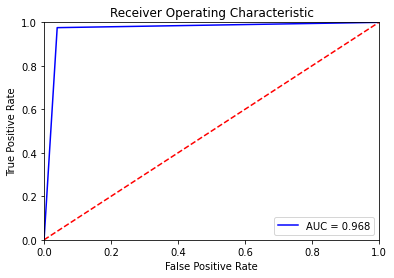


NÚMERO DO SPLIT: 4
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2205    60
0   111  2624
Acuracia: 0.9658
Precisão: 0.9520725388601037
Sensibilidade: 0.9735099337748344
Especificidade: 0.9594149908592322
Área sob a curva ROC: 0.9664624623170333


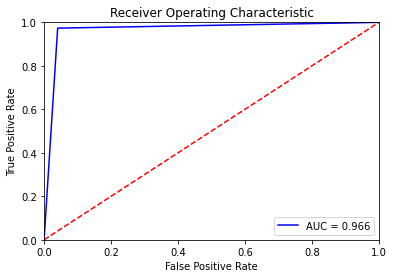


NÚMERO DO SPLIT: 5
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2277    53
0    90  2580
Acuracia: 0.9714
Precisão: 0.9619771863117871
Sensibilidade: 0.9772532188841202
Especificidade: 0.9662921348314607
Área sob a curva ROC: 0.9717726768577906


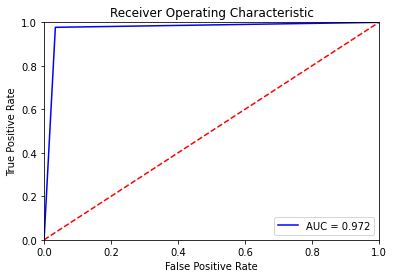


NÚMERO DO SPLIT: 6
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2238    56
0   104  2602
Acuracia: 0.968
Precisão: 0.955593509820666
Sensibilidade: 0.9755884917175239
Especificidade: 0.9615668883961567
Área sob a curva ROC: 0.9685776900568404


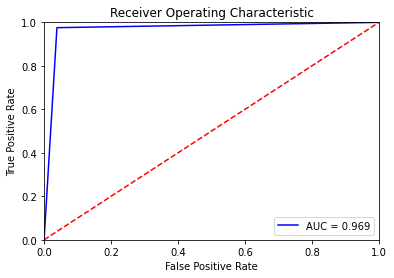


NÚMERO DO SPLIT: 7
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2332    56
0   103  2509
Acuracia: 0.9682
Precisão: 0.9577002053388091
Sensibilidade: 0.9765494137353434
Especificidade: 0.9605666156202144
Área sob a curva ROC: 0.9685580146777789


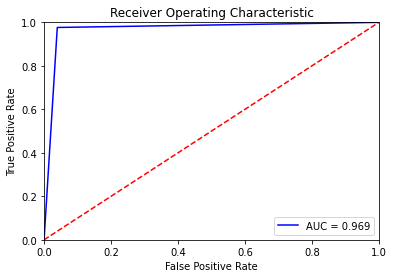


NÚMERO DO SPLIT: 8
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2244    54
0   103  2599
Acuracia: 0.9686
Precisão: 0.956114188325522
Sensibilidade: 0.9765013054830287
Especificidade: 0.9618800888230941
Área sob a curva ROC: 0.9691906971530614


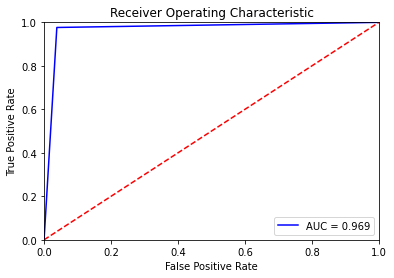


NÚMERO DO SPLIT: 9
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2247    59
0    97  2597
Acuracia: 0.9688
Precisão: 0.9586177474402731
Sensibilidade: 0.9744145706851691
Especificidade: 0.9639940608760208
Área sob a curva ROC: 0.9692043157805951


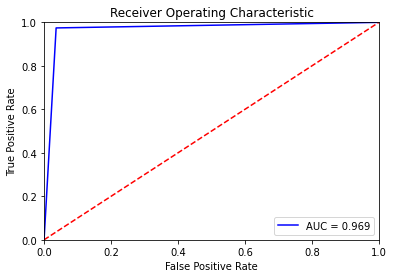


NÚMERO DO SPLIT: 10
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2250    66
0    93  2591
Acuracia: 0.9682
Precisão: 0.9603072983354674
Sensibilidade: 0.9715025906735751
Especificidade: 0.9653502235469449
Área sob a curva ROC: 0.96842640711026


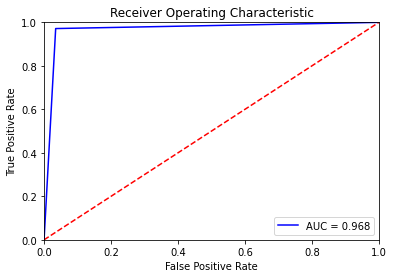

In [24]:
#Classificador Random Forest
## Para session_train_mean_replacing

#MODELO
RF_mean_replacing = RandomForestClassifier(n_estimators=100, max_features=10, random_state=42)
    
#CROSS-VALIDATION
X = session_train_X_mean_replacing
y = session_train_y_mean_replacing
kf = KFold(n_splits=10, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    RF_mean_replacing.fit(X_train, y_train.order.to_numpy())

    #AVALIAÇÃO
    ##Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = RF_mean_replacing.predict(X_test)

    ##Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    ###Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    ##Passo 3: Recuperar os valores da matriz de confusão
    ###Verdadeiro positivo
    a = df_cm.iloc[0,0]
    ###Falso positivo
    b = df_cm.iloc[1,0]
    ###Falso negativo
    c = df_cm.iloc[0, 1]
    ###Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
RF_y_pred_mean_replacing = RF_mean_replacing.predict(session_test_X_mean_replacing)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)
    
DF_RF_y_pred_mean_replacing = pd.DataFrame(RC_y_pred_mean_replacing)
DF_RF_y_pred_mean_replacing.to_csv(f"{path}/predictions/RF_session_predict_y_mean_replacing.csv", sep=',', encoding='utf-8', index=False)

### Para session_train_median_replacing


NÚMERO DO SPLIT: 1
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2275    70
0   165  2490
Acuracia: 0.953
Precisão: 0.9323770491803278
Sensibilidade: 0.9701492537313433
Especificidade: 0.9378531073446328
Área sob a curva ROC: 0.954001180537988


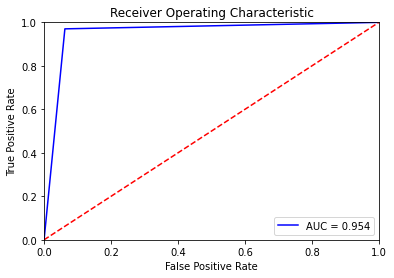


NÚMERO DO SPLIT: 2
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2229    62
0   160  2549
Acuracia: 0.9556
Precisão: 0.9330263708664713
Sensibilidade: 0.9729375818419904
Especificidade: 0.94093761535622
Área sob a curva ROC: 0.9569375985991052


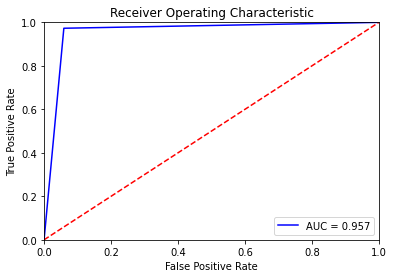


NÚMERO DO SPLIT: 3
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2284    61
0   158  2497
Acuracia: 0.9562
Precisão: 0.9352989352989353
Sensibilidade: 0.9739872068230278
Especificidade: 0.9404896421845574
Área sob a curva ROC: 0.9572384245037926


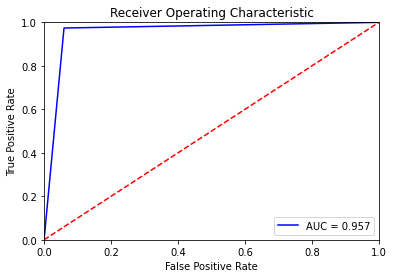


NÚMERO DO SPLIT: 4
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2197    68
0   173  2562
Acuracia: 0.9518
Precisão: 0.9270042194092827
Sensibilidade: 0.9699779249448124
Especificidade: 0.936745886654479
Área sob a curva ROC: 0.9533619057996457


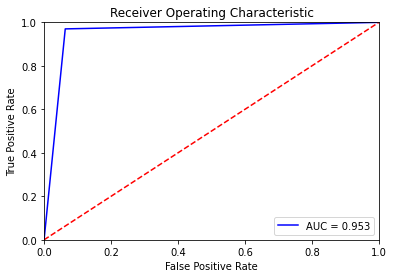


NÚMERO DO SPLIT: 5
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2258    72
0   138  2532
Acuracia: 0.958
Precisão: 0.9424040066777963
Sensibilidade: 0.9690987124463519
Especificidade: 0.9483146067415731
Área sob a curva ROC: 0.9587066595939626


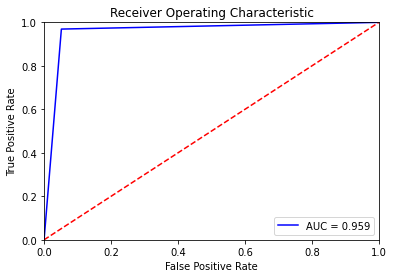


NÚMERO DO SPLIT: 6
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2227    67
0   159  2547
Acuracia: 0.9548
Precisão: 0.9333612740989103
Sensibilidade: 0.9707933740191804
Especificidade: 0.9412416851441242
Área sob a curva ROC: 0.9560175295816524


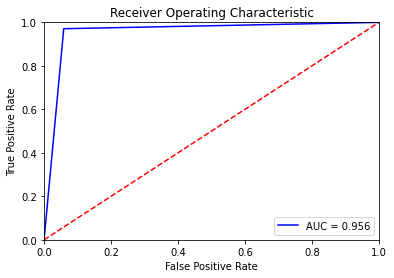


NÚMERO DO SPLIT: 7
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2329    59
0   144  2468
Acuracia: 0.9594
Precisão: 0.9417711281843915
Sensibilidade: 0.9752931323283082
Especificidade: 0.9448698315467075
Área sob a curva ROC: 0.9600814819375078


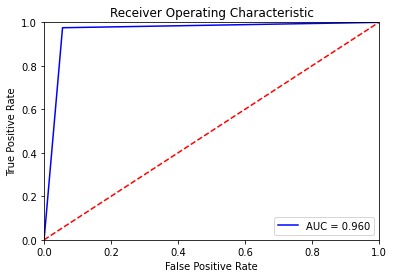


NÚMERO DO SPLIT: 8
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2231    67
0   164  2538
Acuracia: 0.9538
Precisão: 0.9315240083507307
Sensibilidade: 0.9708442123585727
Especificidade: 0.9393042190969653
Área sob a curva ROC: 0.9550742157277688


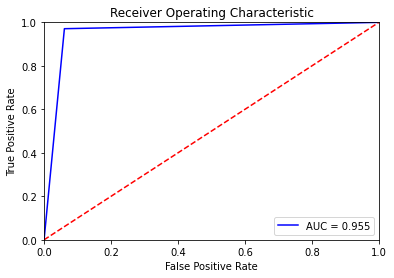


NÚMERO DO SPLIT: 9
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2234    72
0   153  2541
Acuracia: 0.955
Precisão: 0.9359028068705488
Sensibilidade: 0.96877710320902
Especificidade: 0.9432071269487751
Área sob a curva ROC: 0.9559921150788976


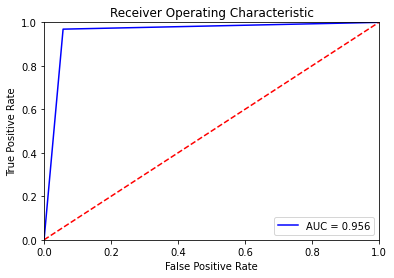


NÚMERO DO SPLIT: 10
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2235    81
0   143  2541
Acuracia: 0.9552
Precisão: 0.93986543313709
Sensibilidade: 0.9650259067357513
Especificidade: 0.9467213114754098
Área sob a curva ROC: 0.9558736091055805


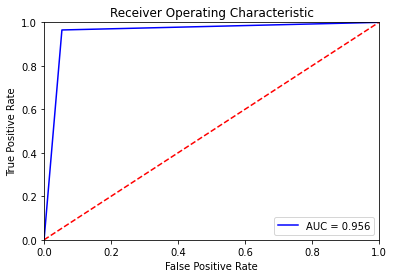

In [6]:
#Classificador Random Forest
## Para session_train_median_replacing

#MODELO
RF_median_replacing = RandomForestClassifier(n_estimators=200, max_features=10, random_state=42)
    
#CROSS-VALIDATION
X = session_train_X_median_replacing
y = session_train_y_median_replacing
kf = KFold(n_splits=10, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    RF_median_replacing.fit(X_train, y_train.order.to_numpy())

    #AVALIAÇÃO
    ##Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = RF_median_replacing.predict(X_test)

    ##Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    ###Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    ##Passo 3: Recuperar os valores da matriz de confusão
    ###Verdadeiro positivo
    a = df_cm.iloc[0,0]
    ### Falso positivo
    b = df_cm.iloc[1,0]
    ###Falso negativo
    c = df_cm.iloc[0, 1]
    ###Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
RF_y_pred_median_replacing = RF_median_replacing.predict(session_test_X_median_replacing)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)
    
DF_RF_y_pred_median_replacing = pd.DataFrame(RF_y_pred_median_replacing)
DF_RF_y_pred_median_replacing.to_csv(f"{path}/predictions/RF_session_predict_y_median_replacing.csv", sep=',', encoding='utf-8', index=False)

### Para session_train_min_replacing


NÚMERO DO SPLIT: 1
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2163   182
0   317  2338
Acuracia: 0.9002
Precisão: 0.8721774193548387
Sensibilidade: 0.9223880597014925
Especificidade: 0.8806026365348399
Área sob a curva ROC: 0.9014953481181661


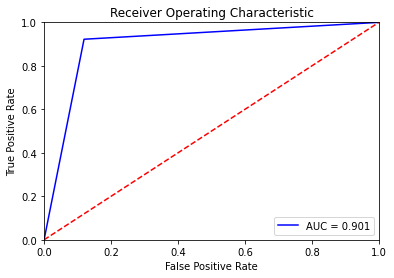


NÚMERO DO SPLIT: 2
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2115   176
0   297  2412
Acuracia: 0.9054
Precisão: 0.8768656716417911
Sensibilidade: 0.9231776516804888
Especificidade: 0.8903654485049833
Área sob a curva ROC: 0.9067715500927361


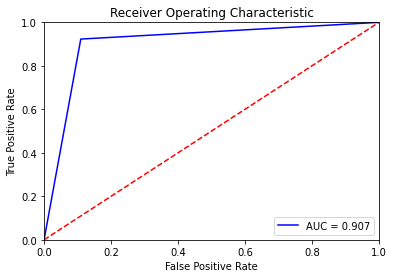


NÚMERO DO SPLIT: 3
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2161   184
0   301  2354
Acuracia: 0.903
Precisão: 0.8777416734362307
Sensibilidade: 0.9215351812366738
Especificidade: 0.8866290018832391
Área sob a curva ROC: 0.9040820915599566


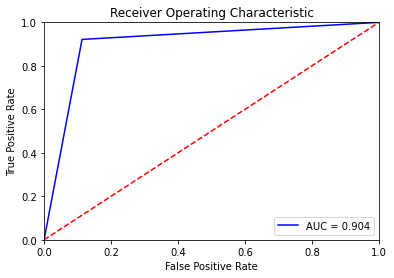


NÚMERO DO SPLIT: 4
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2108   157
0   293  2442
Acuracia: 0.91
Precisão: 0.8779675135360266
Sensibilidade: 0.9306843267108168
Especificidade: 0.8928702010968922
Área sob a curva ROC: 0.9117772639038544


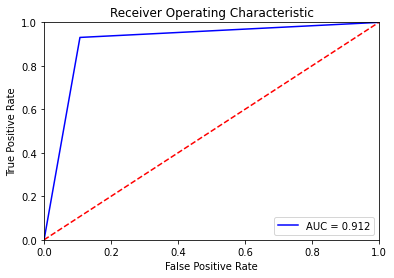


NÚMERO DO SPLIT: 5
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2118   212
0   279  2391
Acuracia: 0.9018
Precisão: 0.8836045056320401
Sensibilidade: 0.9090128755364807
Especificidade: 0.895505617977528
Área sob a curva ROC: 0.9022592467570044


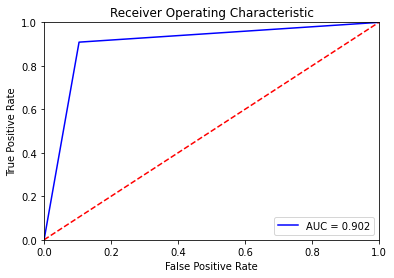


NÚMERO DO SPLIT: 6
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2118   176
0   301  2405
Acuracia: 0.9046
Precisão: 0.8755684167011162
Sensibilidade: 0.923278116826504
Especificidade: 0.8887657058388766
Área sob a curva ROC: 0.9060219113326902


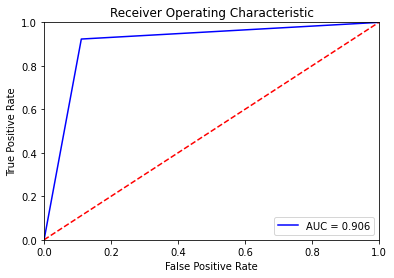


NÚMERO DO SPLIT: 7
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2212   176
0   320  2292
Acuracia: 0.9008
Precisão: 0.8736176935229067
Sensibilidade: 0.9262981574539364
Especificidade: 0.877488514548239
Área sob a curva ROC: 0.9018933360010877


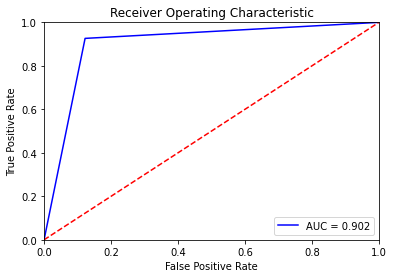


NÚMERO DO SPLIT: 8
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2121   177
0   282  2420
Acuracia: 0.9082
Precisão: 0.8826466916354557
Sensibilidade: 0.922976501305483
Especificidade: 0.8956328645447816
Área sob a curva ROC: 0.9093046829251323


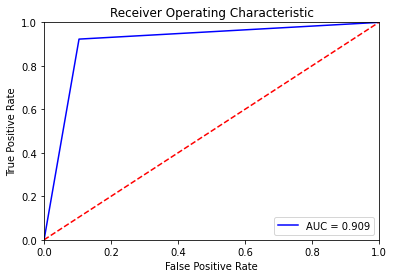


NÚMERO DO SPLIT: 9
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2112   194
0   272  2422
Acuracia: 0.9068
Precisão: 0.8859060402684564
Sensibilidade: 0.9158716392020815
Especificidade: 0.8990348923533779
Área sob a curva ROC: 0.9074532657777298


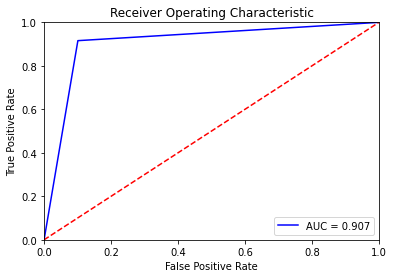


NÚMERO DO SPLIT: 10
Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  2131   185
0   300  2384
Acuracia: 0.903
Precisão: 0.8765939942410531
Sensibilidade: 0.9201208981001727
Especificidade: 0.8882265275707899
Área sob a curva ROC: 0.9041737128354814


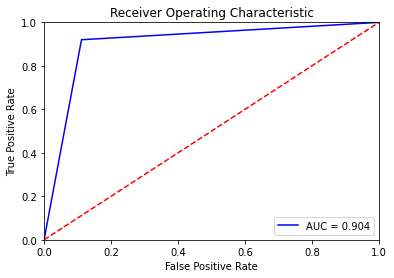

In [7]:
#Classificador Random Forest
## Para session_train_min_replacing

#MODELO
RF_min_replacing = RandomForestClassifier(n_estimators=250, max_features=10, random_state=42)
    
#CROSS-VALIDATION
X = session_train_X_min_replacing
y = session_train_y_min_replacing
kf = KFold(n_splits=10, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    RF_min_replacing.fit(X_train, y_train.order.to_numpy())

    #AVALIAÇÃO
    ##Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = RF_min_replacing.predict(X_test)

    ##Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    ###Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    ##Passo 3: Recuperar os valores da matriz de confusão
    ###Verdadeiro positivo
    a = df_cm.iloc[0,0]
    ###Falso positivo
    b = df_cm.iloc[1,0]
    ###Falso negativo
    c = df_cm.iloc[0, 1]
    ###Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
RF_y_pred_min_replacing = RF_min_replacing.predict(session_test_X_min_replacing)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)

DF_RF_y_pred_min_replacing = pd.DataFrame(RF_y_pred_min_replacing)
DF_RF_y_pred_min_replacing.to_csv(f"{path}/predictions/RF_session_predict_y_min_replacing.csv", sep=',', encoding='utf-8', index=False)

### Classificador Rede Neural MLP

### Para session_train_mean_drop_replacing

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 99)                3366      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 100       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________

NÚMERO DO SPLIT: 1
Epoch 1/50
1790/1790 [==============================] - 4s 2ms/step - loss: 0.3452A: 0s - loss: 0.
Epoch 2/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.2865
Epoch 3/50
1790/1790 [==============================] - 3s 1ms/step - loss: 0.2722
Epoch 4/50
1790/1790 [==============================] - 3s 1ms/step - loss: 0.2636
Epoch 5/50
1790/1790 [==============================] - 3s 1ms/step - loss: 0.2572
Epoch 6/50
1790/1790 [==============================] - 3s 1ms

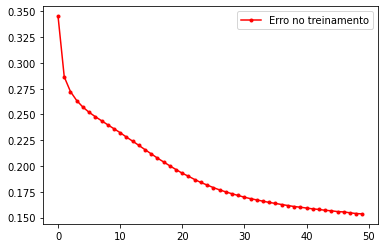

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7457   204
0   582  6074
Acuracia: 0.9451002304952155
Precisão: 0.9276029356885185
Sensibilidade: 0.9733716225035897
Especificidade: 0.9125600961538461
Área sob a curva ROC: 0.9750574878819295


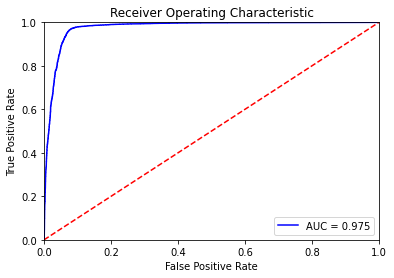


NÚMERO DO SPLIT: 2
Epoch 1/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1638
Epoch 2/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1625
Epoch 3/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1612
Epoch 4/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1601
Epoch 5/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1592
Epoch 6/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1586
Epoch 7/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1577
Epoch 8/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1574
Epoch 9/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1567
Epoch 10/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1560
Epoch 11/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1555
Epoch 12/50
1790/1790 [==============================] - 3s 2ms/s

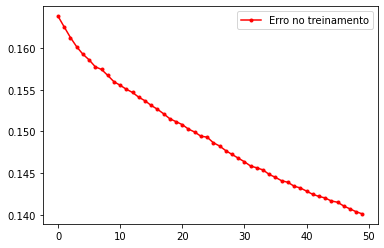

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7505   166
0   462  6184
Acuracia: 0.9561360620241671
Precisão: 0.9420107945274256
Sensibilidade: 0.9783600573588841
Especificidade: 0.9304845019560638
Área sob a curva ROC: 0.9796106981309639


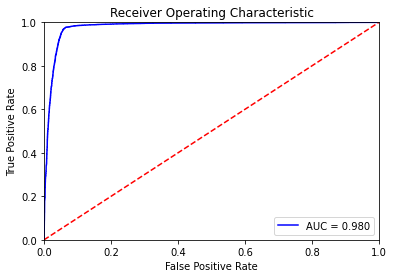


NÚMERO DO SPLIT: 3
Epoch 1/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1484
Epoch 2/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1460
Epoch 3/50
1790/1790 [==============================] - 4s 2ms/step - loss: 0.1447
Epoch 4/50
1790/1790 [==============================] - 4s 2ms/step - loss: 0.1438
Epoch 5/50
1790/1790 [==============================] - 4s 2ms/step - loss: 0.1429
Epoch 6/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1422
Epoch 7/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1417A: 0s - loss: 0.14
Epoch 8/50
1790/1790 [==============================] - 4s 2ms/step - loss: 0.1411
Epoch 9/50
1790/1790 [==============================] - 4s 2ms/step - loss: 0.1406
Epoch 10/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1403
Epoch 11/50
1790/1790 [==============================] - 3s 2ms/step - loss: 0.1398
Epoch 12/50
1790/1790 [========================

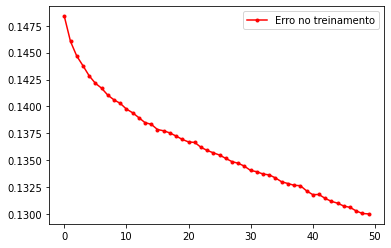

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7575   198
0   390  6153
Acuracia: 0.9589270746018441
Precisão: 0.9510357815442562
Sensibilidade: 0.974527209571594
Especificidade: 0.9403943145346172
Área sob a curva ROC: 0.981199887791162


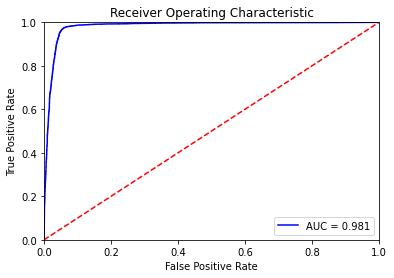

In [23]:
#Classificador Rede Neural MLP
## Para session_train_min_replacing

#MODELO
##Criar o modelo
input_neuron, hidden_neuron, output_neuron = X.shape[-1], X.shape[-1]*3, 1

mlp = Sequential([                  
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

##Usar a função summary()
mlp.summary()

##Compile o modelo
mlp.compile(optimizer="adam", loss="binary_crossentropy")
    
#CROSS-VALIDATION
X = session_train_X_mean_drop_replacing
y = session_train_y_mean_drop_replacing
kf = KFold(n_splits=3, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    ##Treine o modelo
    batch_size = 16
    Log = mlp.fit(X_train, y_train.order.to_numpy(), batch_size=batch_size, epochs=50, shuffle=False)
    
    ##Visualizando o comportamento do erro durante o treinamento de forma gráfica
    fig, ax = plt.subplots()
    ax.plot(Log.history["loss"],'r', marker='.', label="Erro no treinamento")
    ax.legend()
    plt.show()

    #AVALIAÇÃO
    ##Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = mlp.predict(X_test)

    ##Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, np.round(abs(y_pred)))
    df_cm = pd.DataFrame(cm)

    ###Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    ##Passo 3: Recuperar os valores da matriz de confusão
    ###Verdadeiro positivo
    a = df_cm.iloc[0,0]
    ###Falso positivo
    b = df_cm.iloc[1,0]
    ###Falso negativo
    c = df_cm.iloc[0, 1]
    ###Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
Log_y_pred_mean_drop_replacing = mlp.predict(session_test_X_mean_drop_replacing)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)

DF_Log_y_pred_drop_mean_replacing = pd.DataFrame(np.round(abs(Log_y_pred_mean_drop_replacing)))
DF_Log_y_pred_drop_mean_replacing.to_csv(f"{path}/predictions/Log_session_predict_y_mean_drop_replacing.csv", sep=',', encoding='utf-8', index=False)

### Para session_train_mean_replacing

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 99)                3366      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 100       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________

NÚMERO DO SPLIT: 1
Epoch 1/50
2084/2084 [==============================] - 6s 2ms/step - loss: 0.3013
Epoch 2/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2514
Epoch 3/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.2387
Epoch 4/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2309
Epoch 5/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2250
Epoch 6/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.

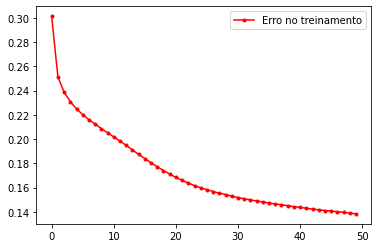

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7491   212
0   545  8419
Acuracia: 0.9545809083818324
Precisão: 0.9321801891488303
Sensibilidade: 0.9724782552252369
Especificidade: 0.9392012494422133
Área sob a curva ROC: 0.9820780011589334


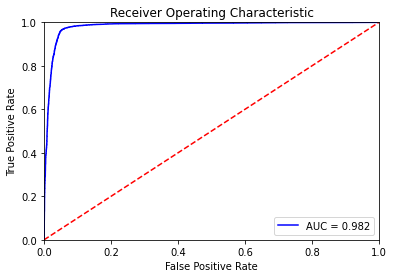


NÚMERO DO SPLIT: 2
Epoch 1/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.1431
Epoch 2/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.1413A: 0
Epoch 3/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1402
Epoch 4/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1392
Epoch 5/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1384
Epoch 6/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1376
Epoch 7/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1369
Epoch 8/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1363
Epoch 9/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1360
Epoch 10/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.1353
Epoch 11/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1345
Epoch 12/50
2084/2084 [==============================] - 4s 2

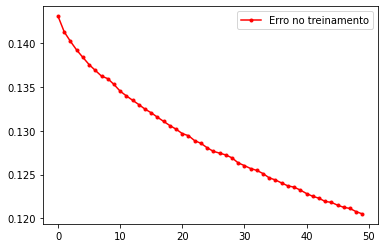

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7546   202
0   490  8429
Acuracia: 0.9584808303833924
Precisão: 0.9390243902439024
Sensibilidade: 0.9739287558079505
Especificidade: 0.9450611055051015
Área sob a curva ROC: 0.9827557898908105


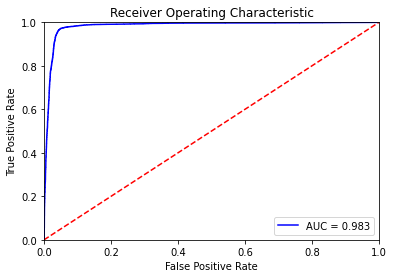


NÚMERO DO SPLIT: 3
Epoch 1/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1329
Epoch 2/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1309
Epoch 3/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1297
Epoch 4/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.1287
Epoch 5/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1279A: 0s - loss: 0.129 - ETA: 0s - loss: 
Epoch 6/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1278A: 0s - 
Epoch 7/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1270
Epoch 8/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.1262
Epoch 9/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1255
Epoch 10/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1251
Epoch 11/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1247
Epoch 12/50
2084/20

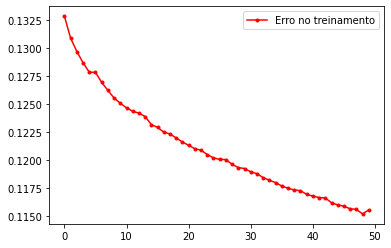

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7529   198
0   362  8577
Acuracia: 0.9663986559462379
Precisão: 0.9541249524775061
Sensibilidade: 0.974375566196454
Especificidade: 0.9595033001454302
Área sob a curva ROC: 0.9852342610071891


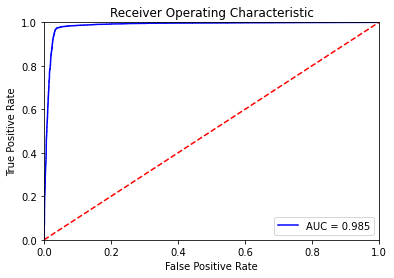

In [19]:
#Classificador Rede Neural MLP
## Para session_train_mean_replacing

#MODELO
##Criar o modelo
input_neuron, hidden_neuron, output_neuron = X.shape[-1], X.shape[-1]*3, 1

mlp = Sequential([                  
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

##Usar a função summary()
mlp.summary()

##Compile o modelo
mlp.compile(optimizer="adam", loss="binary_crossentropy")
    
#CROSS-VALIDATION
X = session_train_X_mean_replacing
y = session_train_y_mean_replacing
kf = KFold(n_splits=3, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    ##Treine o modelo
    batch_size = 16
    Log = mlp.fit(X_train, y_train.order.to_numpy(), batch_size=batch_size, epochs=50,shuffle=False)
    
    ##Visualizando o comportamento do erro durante o treinamento de forma gráfica
    fig, ax = plt.subplots()
    ax.plot(Log.history["loss"],'r', marker='.', label="Erro no treinamento")
    ax.legend()
    plt.show()
    
    #AVALIAÇÃO
    ##Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = mlp.predict(X_test)

    ##Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, np.round(abs(y_pred)))
    df_cm = pd.DataFrame(cm)

    ###Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    ##Passo 3: Recuperar os valores da matriz de confusão
    ###Verdadeiro positivo
    a = df_cm.iloc[0,0]
    ###Falso positivo
    b = df_cm.iloc[1,0]
    ###Falso negativo
    c = df_cm.iloc[0, 1]
    ###Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
Log_y_pred_mean_replacing = mlp.predict(session_test_X_mean_replacing)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)

DF_Log_y_pred_mean_replacing = pd.DataFrame(np.round(abs(Log_y_pred_mean_replacing)))
DF_Log_y_pred_mean_replacing.to_csv(f"{path}/predictions/Log_session_predict_y_mean_replacing.csv", sep=',', encoding='utf-8', index=False)

### Para session_train_median_replacing

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 99)                3366      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 100       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________

NÚMERO DO SPLIT: 1
Epoch 1/50
2084/2084 [==============================] - 3s 1ms/step - loss: 0.3086
Epoch 2/50
2084/2084 [==============================] - 3s 1ms/step - loss: 0.2546
Epoch 3/50
2084/2084 [==============================] - 3s 1ms/step - loss: 0.2431A: 0s - los
Epoch 4/50
2084/2084 [==============================] - 3s 1ms/step - loss: 0.2367
Epoch 5/50
2084/2084 [==============================] - 3s 1ms/step - loss: 0.2311
Epoch 6/50
2084/2084 [==============================] - 3s 1ms/step

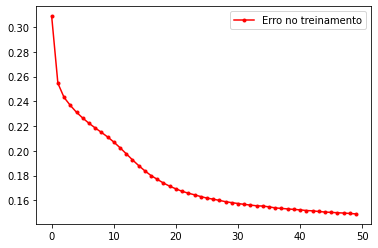

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7488   215
0   643  8321
Acuracia: 0.9485210295794084
Precisão: 0.9209199360472267
Sensibilidade: 0.9720887965727638
Especificidade: 0.928268630075859
Área sob a curva ROC: 0.9796443335330156


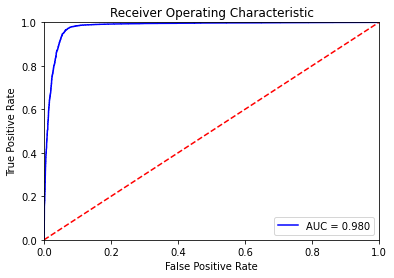


NÚMERO DO SPLIT: 2
Epoch 1/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1556
Epoch 2/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1541
Epoch 3/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1534
Epoch 4/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1525
Epoch 5/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1520
Epoch 6/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1514
Epoch 7/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1511
Epoch 8/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1508
Epoch 9/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1502
Epoch 10/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1499
Epoch 11/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1495
Epoch 12/50
2084/2084 [==============================] - 5s 2ms/s

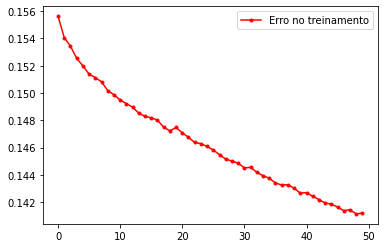

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7541   207
0   609  8310
Acuracia: 0.9510409791804164
Precisão: 0.9252760736196319
Sensibilidade: 0.9732834279814145
Especificidade: 0.9317188025563404
Área sob a curva ROC: 0.9804770352434227


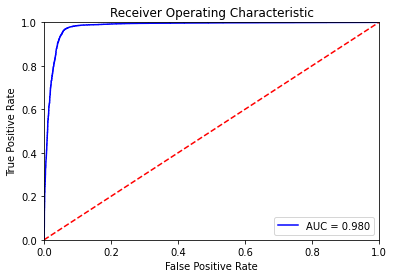


NÚMERO DO SPLIT: 3
Epoch 1/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1503
Epoch 2/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1486
Epoch 3/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1475
Epoch 4/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1467
Epoch 5/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1462
Epoch 6/50
2084/2084 [==============================] - 5s 2ms/step - loss: 0.1457
Epoch 7/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1453
Epoch 8/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1448
Epoch 9/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1445
Epoch 10/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1445
Epoch 11/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.1442
Epoch 12/50
2084/2084 [==============================] - 4s 2ms/s

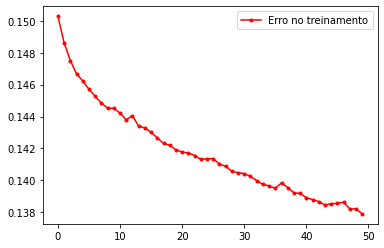

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7512   215
0   555  8384
Acuracia: 0.9537981519260771
Precisão: 0.9312011900334697
Sensibilidade: 0.9721754885466546
Especificidade: 0.9379125181787672
Área sob a curva ROC: 0.9825981072148368


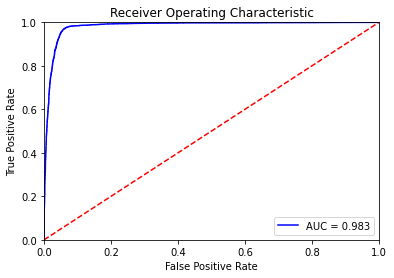

In [22]:
#Classificador Rede Neural MLP
## Para session_train_median_replacing

#MODELO
##Criar o modelo
input_neuron, hidden_neuron, output_neuron = X.shape[-1], X.shape[-1]*3, 1

mlp = Sequential([                  
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

##Usar a função summary()
mlp.summary()

##Compile o modelo
mlp.compile(optimizer="adam", loss="binary_crossentropy")
    
#CROSS-VALIDATION
X = session_train_X_median_replacing
y = session_train_y_median_replacing
kf = KFold(n_splits=3, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    ##Treine o modelo
    batch_size = 16
    Log = mlp.fit(X_train, y_train.order.to_numpy(), batch_size=batch_size, epochs=50, shuffle=False)
    
    ##Visualizando o comportamento do erro durante o treinamento de forma gráfica
    fig, ax = plt.subplots()
    ax.plot(Log.history["loss"],'r', marker='.', label="Erro no treinamento")
    ax.legend()
    plt.show()
    
    #AVALIAÇÃO
    ##Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = mlp.predict(X_test)

    ##Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, np.round(abs(y_pred)))
    df_cm = pd.DataFrame(cm)

    ###Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    ##Passo 3: Recuperar os valores da matriz de confusão
    ###Verdadeiro positivo
    a = df_cm.iloc[0,0]
    ###Falso positivo
    b = df_cm.iloc[1,0]
    ###Falso negativo
    c = df_cm.iloc[0, 1]
    ###Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
Log_y_pred_median_replacing = mlp.predict(session_test_X_median_replacing)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)

DF_Log_y_pred_median_replacing = pd.DataFrame(np.round(abs(Log_y_pred_median_replacing)))
DF_Log_y_pred_median_replacing.to_csv(f"{path}/predictions/Log_session_predict_y_median_replacing.csv", sep=',', encoding='utf-8', index=False)

### Para session_train_min_replacing

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 99)                3366      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 100       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________

NÚMERO DO SPLIT: 1
Epoch 1/50
2084/2084 [==============================] - 4s 1ms/step - loss: 0.3883
Epoch 2/50
2084/2084 [==============================] - 3s 1ms/step - loss: 0.3217
Epoch 3/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2970
Epoch 4/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2852
Epoch 5/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2771
Epoch 6/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.

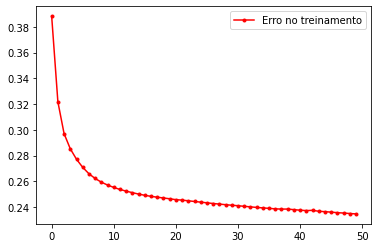

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7123   580
0  1107  7857
Acuracia: 0.8987820243595128
Precisão: 0.8654921020656136
Sensibilidade: 0.9247046605218746
Especificidade: 0.8765060240963856
Área sob a curva ROC: 0.960080582256616


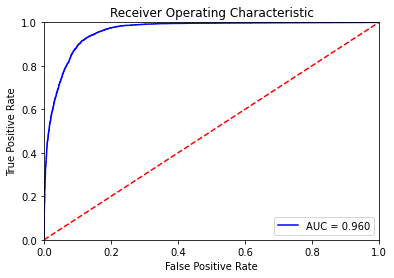


NÚMERO DO SPLIT: 2
Epoch 1/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2415
Epoch 2/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2404A: 0s - loss: 0.2
Epoch 3/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2394
Epoch 4/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2385
Epoch 5/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2379
Epoch 6/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2374
Epoch 7/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2369
Epoch 8/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2365
Epoch 9/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2361
Epoch 10/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2357
Epoch 11/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2353A: 0s - loss: 0.235
Epoch 12/50
2084/2084 [======

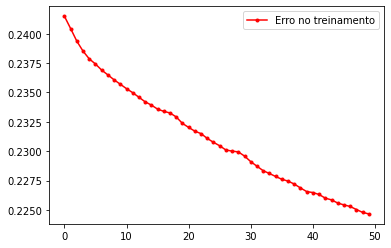

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7025   723
0   938  7981
Acuracia: 0.9003419931601367
Precisão: 0.8822051990455858
Sensibilidade: 0.9066855962829117
Especificidade: 0.8948312591097657
Área sob a curva ROC: 0.9616859774452606


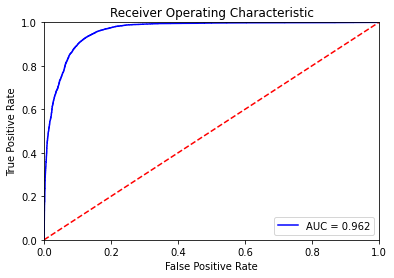


NÚMERO DO SPLIT: 3
Epoch 1/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2361
Epoch 2/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2346
Epoch 3/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2334
Epoch 4/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2327
Epoch 5/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2323
Epoch 6/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2327
Epoch 7/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2317
Epoch 8/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2312
Epoch 9/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2307
Epoch 10/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2303
Epoch 11/50
2084/2084 [==============================] - 4s 2ms/step - loss: 0.2299
Epoch 12/50
2084/2084 [==============================] - 4s 2ms/s

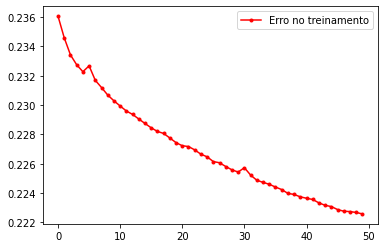

Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  7213   514
0  1044  7895
Acuracia: 0.906516260650426
Precisão: 0.8735618263291752
Sensibilidade: 0.9334800051766533
Especificidade: 0.8832084125741134
Área sob a curva ROC: 0.9654300078789197


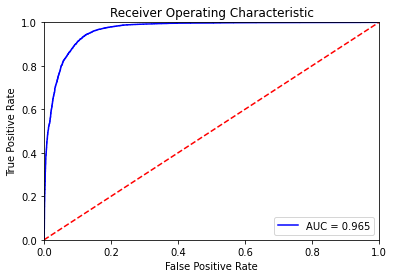

In [21]:
#Classificador Rede Neural MLP
## Para session_train_min_replacing

#MODELO
##Criar o modelo
input_neuron, hidden_neuron, output_neuron = X.shape[-1], X.shape[-1]*3, 1

mlp = Sequential([                  
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

##Usar a função summary()
mlp.summary()

##Compile o modelo
mlp.compile(optimizer="adam", loss="binary_crossentropy")
    
#CROSS-VALIDATION
X = session_train_X_min_replacing
y = session_train_y_min_replacing
kf = KFold(n_splits=3, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #DATA MINING
    ##Treine o modelo
    batch_size = 16
    Log = mlp.fit(X_train, y_train.order.to_numpy(), batch_size=batch_size, epochs=50, shuffle=False)

    ##Visualizando o comportamento do erro durante o treinamento de forma gráfica
    fig, ax = plt.subplots()
    ax.plot(Log.history["loss"],'r', marker='.', label="Erro no treinamento")
    ax.legend()
    plt.show()
    
    #AVALIAÇÃO
    ##Passo 1: Recuperar a resposta do modelo para o conjunto de teste e armazenar em um vetor
    y_pred = mlp.predict(X_test)

    ##Passo 2: Gerar a Matriz de Confusão (linhas = real | colunas = previsto)
    cm = confusion_matrix(y_test, np.round(abs(y_pred)))
    df_cm = pd.DataFrame(cm)

    ###Mudandando a ordem para vir primeiro 1 e depois 0
    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    ##Passo 3: Recuperar os valores da matriz de confusão
    ###Verdadeiro positivo
    a = df_cm.iloc[0,0]
    ###Falso positivo
    b = df_cm.iloc[1,0]
    ####Falso negativo
    c = df_cm.iloc[0, 1]
    ####Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    ##Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    ##Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    ##Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    ##Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    ##Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
Log_y_pred_min_replacing = mlp.predict(session_test_X_min_replacing)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)

DF_Log_y_pred_min_replacing = pd.DataFrame(np.round(abs(Log_y_pred_min_replacing)))
DF_Log_y_pred_min_replacing.to_csv(f"{path}/predictions/Log_session_predict_y_min_replacing.csv", sep=',', encoding='utf-8', index=False)